<a href="https://colab.research.google.com/github/subhedarsoham18/Iris-Species/blob/main/Iris_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Iris.csv")

# Drop 'Id' column and separate features and labels
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Accuracy: 1.00


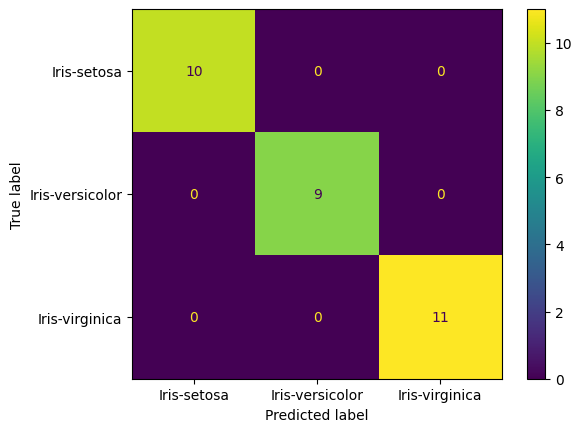

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()


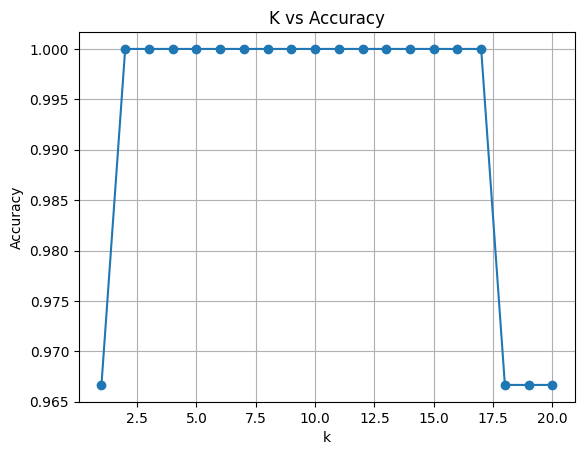

In [6]:
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

# Plotting
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()


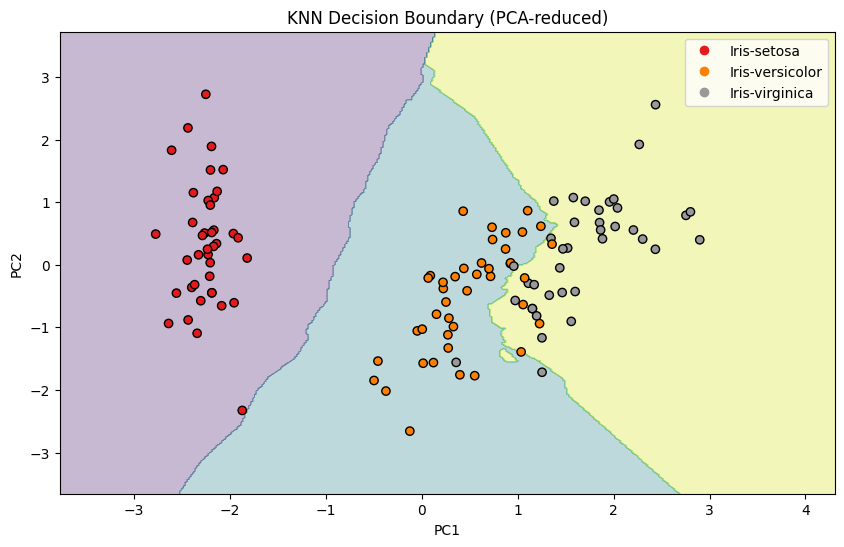

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train on PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca)

# Mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Convert string labels to numerical values using pd.factorize
Z_numeric, _ = pd.factorize(Z)
Z_numeric = Z_numeric.reshape(xx.shape)


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.3)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=pd.factorize(y_train_pca)[0], cmap='Set1', edgecolor='k')
plt.legend(handles=scatter.legend_elements()[0], labels=list(knn.classes_))
plt.title('KNN Decision Boundary (PCA-reduced)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()